In [241]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import koreanize_matplotlib

# 데이터베이스 연결
conn = pymysql.connect(host='172.20.81.42', user='user1', password='1234',
                       db='7_mini', charset='utf8')

# 커서 생성 및 쿼리 실행
cur = conn.cursor()
cur.execute('SELECT * FROM nationwide_shut_down')

desc = cur.description
for i in range(len(desc)):
    print(desc[i][0], end='')
print()

# 데이터 가져오기 및 DataFrame 변환
rows = cur.fetchall()
for data in rows:
    print(data)
print()

# 커서 및 연결 종료
cur.close()
conn.close() 

year총계신규폐업
(2006, 4891, 1010, 795)
(2007, 5005, 1135, 894)
(2008, 5234, 1087, 844)
(2009, 5419, 1043, 840)
(2010, 5602, 1071, 860)
(2011, 5772, 1083, 897)
(2012, 5918, 1053, 889)
(2013, 6057, 1027, 863)
(2014, 6348, 1127, 815)
(2015, 6702, 1191, 790)
(2016, 6886, 1226, 909)
(2017, 7226, 1285, 908)
(2018, 7674, 1373, 901)
(2019, 8046, 1316, 922)
(2020, 8651, 1519, 895)
(2021, 9206, 1457, 885)
(2022, 9677, 1351, 867)
(2023, 9950, 1276, 986)



In [293]:
import pymysql
import pandas as pd

# MySQL 데이터베이스 연결
conn = pymysql.connect(
    host='172.20.81.42',
    user='user1',
    password='1234',
    db='7_mini',
    charset='utf8'
)

# 커서 생성 및 쿼리 실행
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('SELECT * FROM nationwide_shut_down')

# 컬럼명 가져오기
columns = [desc[0] for desc in cur.description]  # 컬럼명을 리스트로 변환

# 데이터 가져오기 및 DataFrame 변환
rows = cur.fetchall()  # 모든 행 가져오기
sdDF = pd.DataFrame(rows, columns=columns)  # 데이터프레임 변환


cur.execute('select * from 가계부채_총액_gdp비율')
cur.execute('select * from gdp')
cur.execute('SELECT * FROM gdp ORDER BY year')
cur.execute('select * from debt_total_gdp_ratio')
cur.execute('SELECT * FROM debt_total_gdp_ratio ORDER BY year')

rows = cur.fetchall()   # 모든 데이터를 가져옴 -> DataFrame 변환 가능

debtDF = pd.DataFrame(rows)
print(debtDF)

cur.close()
conn.close() 


# DataFrame 출력
print(sdDF) 

    year    국가채무  GDP_대비_국가채무_비율
0   2004   203.7            21.6
1   2005   247.9            24.9
2   2006   282.7            27.0
3   2007   299.2            26.4
4   2008   309.0            25.7
5   2009   359.6            28.6
6   2010   392.2            28.4
7   2011   420.5            29.0
8   2012   443.1            29.4
9   2013   489.8            31.2
10  2014   533.2            32.5
11  2015   591.5            34.0
12  2016   626.9            34.2
13  2017   660.2            34.2
14  2018   680.5            33.9
15  2019   723.2            35.4
16  2020   846.6            41.1
17  2021   970.7            43.7
18  2022  1067.4            45.9
19  2023  1126.8            46.9
    year    총계    신규   폐업
0   2006  4891  1010  795
1   2007  5005  1135  894
2   2008  5234  1087  844
3   2009  5419  1043  840
4   2010  5602  1071  860
5   2011  5772  1083  897
6   2012  5918  1053  889
7   2013  6057  1027  863
8   2014  6348  1127  815
9   2015  6702  1191  790
10  2016  6886  1226 

In [234]:
debtDF.set_index('year',inplace=True)

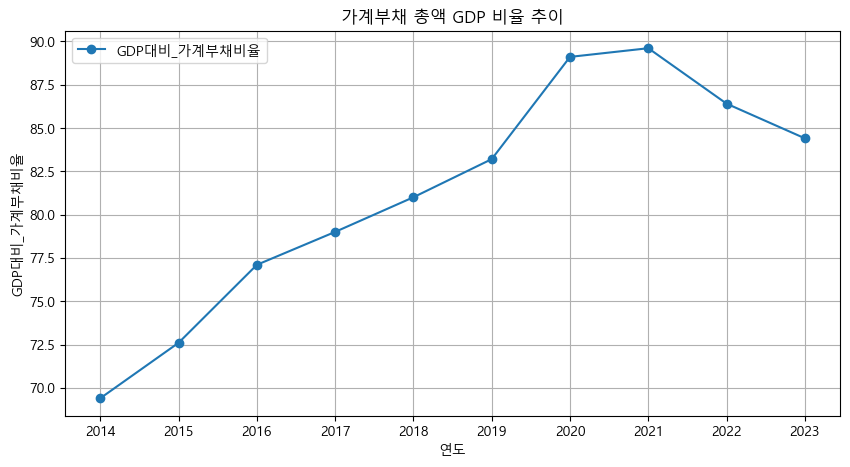

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(debtDF.index, debtDF.iloc[:, 0], marker='o', linestyle='-', label=debtDF.columns[0])  # 첫 번째 컬럼만 그림
plt.xlabel('연도')
plt.xticks(debtDF.index) 
plt.ylabel(debtDF.columns[0])
plt.title('가계부채 총액 GDP 비율 추이')
plt.legend()
plt.grid()
plt.show()

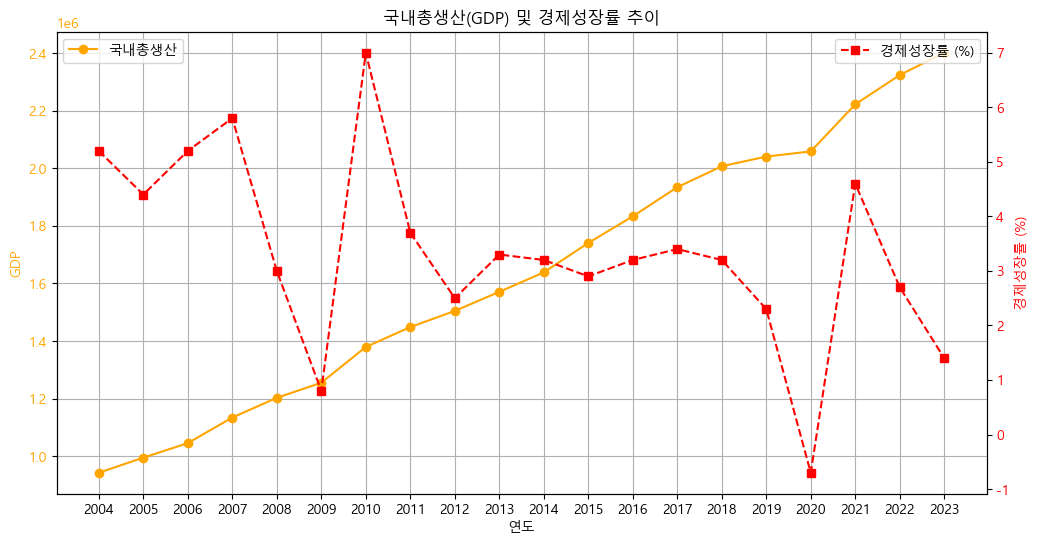

In [290]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 국내총생산(GDP) 그래프 (왼쪽 Y축)
ax1.plot(gdpDF["year"], gdpDF["국내총생산"], marker='o', linestyle='-', color='orange', label="국내총생산")
ax1.set_xlabel("연도")
ax1.set_ylabel("GDP", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")

# 보조축 추가 (경제성장률)
ax2 = ax1.twinx()
ax2.plot(gdpDF["year"], gdpDF["경제성장률"], marker='s', linestyle='--', color='red', label="경제성장률 (%)")
ax2.set_ylabel("경제성장률 (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# X축을 2004~2023년으로 정확하게 설정하여 표시
plt.xticks(gdpDF["year"], gdpDF["year"], rotation=45)  # 연도를 그대로 X축에 적용

# 제목 및 격자 설정
plt.title("국내총생산(GDP) 및 경제성장률 추이")
ax1.grid()

# 범례 설정
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# 그래프 출력
plt.show()

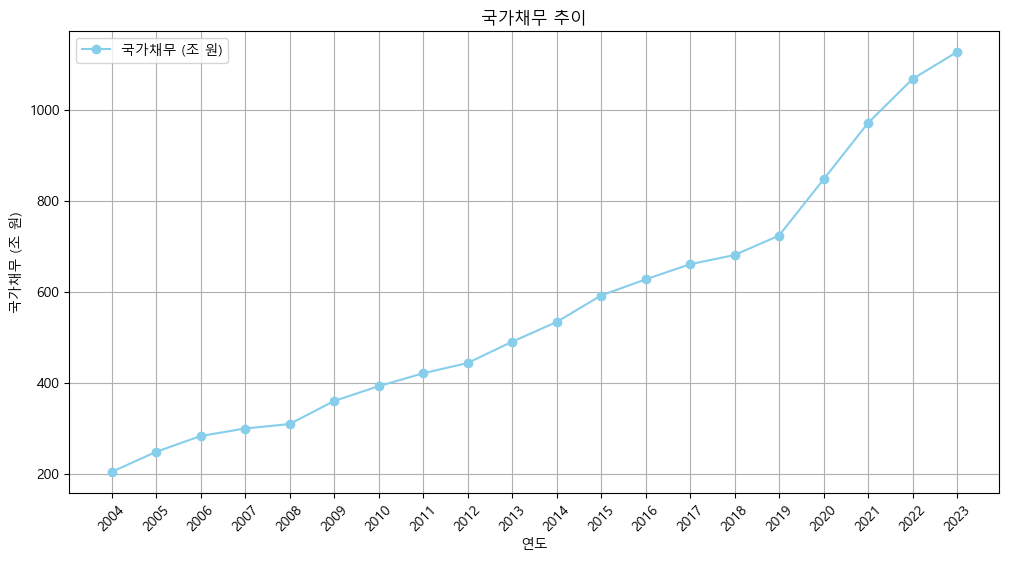

In [298]:
# 그래프 설정
plt.figure(figsize=(12, 6))

# 국가채무 그래프
plt.plot(debtDF["year"], debtDF["국가채무"], marker='o', linestyle='-', color='skyblue', label="국가채무 (조 원)")

# X축 연도를 2004~2023년으로 설정하여 정확하게 표시
plt.xticks(debtDF["year"], debtDF["year"], rotation=45)

# 그래프 레이블 및 타이틀 설정
plt.xlabel('연도')
plt.ylabel('국가채무 (조 원)')
plt.title('국가채무 추이')
plt.legend()
plt.grid()
plt.show()

In [231]:
debtDF.iloc[:, 0].dtypes

dtype('int64')

In [ ]:
sdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    18 non-null     int64
 1   총계      18 non-null     int64
 2   신규      18 non-null     int64
 3   폐업      18 non-null     int64
dtypes: int64(4)
memory usage: 708.0 bytes


In [ ]:
columns

['year', '총계', '신규', '폐업']

In [ ]:
sdDF.isna().sum()

year    0
총계      0
신규      0
폐업      0
dtype: int64

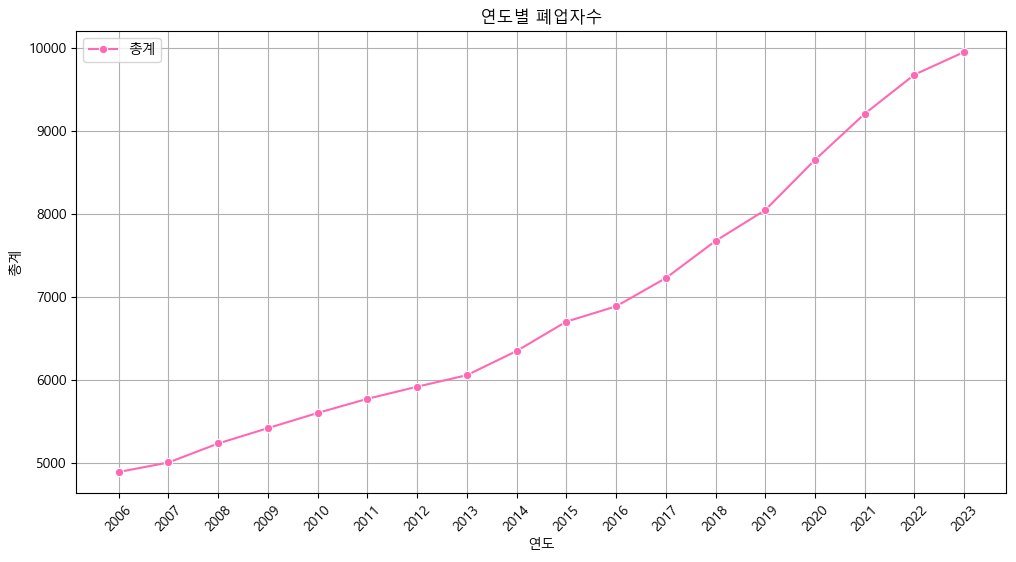

In [ ]:

# 한글 폰트 적용 (Mac & Windows 대응)
plt.rc('font', family='Malgun Gothic')  # Windows

# 데이터 시각화 (연도별 총계 변화)

plt.figure(figsize=(12, 6))
sns.lineplot(x=sdDF['year'], y=sdDF['총계'], marker='o', color='hotpink', label='총계')
plt.xlabel('연도')
plt.ylabel('총계')
plt.title('연도별 폐업자수')
plt.xticks(range(2006, 2024), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


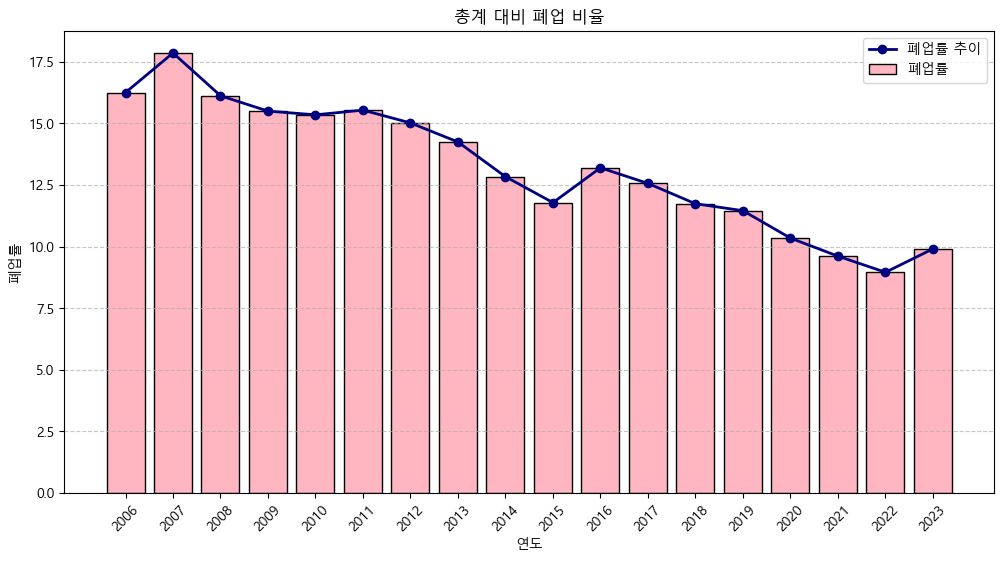

In [ ]:
# '총계'와 '폐업' 컬럼이 숫자형인지 확인 후 변환
sdDF['총계'] = sdDF['총계'].astype(float)
sdDF['폐업'] = sdDF['폐업'].astype(float)

# 폐업률 계산 (폐업 / 총계)
sdDF['폐업률'] = (sdDF['폐업'] / sdDF['총계'] ) * 100

# 한글 폰트 적용 (Mac & Windows 대응)
plt.rc('font', family='Malgun Gothic')  

# 바 그래프 + 꺾은선 그래프 시각화
plt.figure(figsize=(12, 6))

# 바 그래프 (폐업률)
plt.bar(sdDF['year'], sdDF['폐업률'], color='lightpink', edgecolor='black', label='폐업률')

# 꺾은선 그래프 (폐업률 변화 추이)
plt.plot(sdDF['year'], sdDF['폐업률'], marker='o', color='navy', linestyle='-', linewidth=2, label='폐업률 추이')

plt.xlabel('연도')
plt.ylabel('폐업률')
plt.title('총계 대비 폐업 비율')
plt.xticks(sdDF['year'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show() 